# HyperSpectral Image processing
This notebook what to explain how to process hyper spectral images and how to reduce the dimensionality with the PCA method.

The dataset is the famous free  <a href="http://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Indian_Pines"> Indian Pines dataset </a>.

In [31]:
import numpy as np
import scipy.io as sio
import sklearn
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [4]:
# Import Indian Pines HyperSpectral dataset from .mat file
indian_pines = sio.loadmat("Data\Indian_pines.mat")
# Data are stored in a data Dictionary
print(indian_pines)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri May 20 18:20:38 2011', '__version__': '1.0', '__globals__': [], 'indian_pines': array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [2580, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [2570, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[2576, 4388, 4334, ..., 1030, 1006, 1015],
        [2747, 4264, 4592, ..., 1039, 1015, 1020],
        [2750, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [2744, 4268, 4597, ..., 1019, 1016, 1010]],

       [[2744, 4146, 4416, ..., 1029, 1025, 1010],
        [2576, 4389, 4416, ..., 1021, 1011, 1000],
        [2744, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [2570, 4266, 4509, ..., 1025, 1

In [6]:
# Read the keys
indian_pines_key=list(indian_pines.keys())
indian_pines_key

['__header__', '__version__', '__globals__', 'indian_pines']

In [8]:
# Get data corresponding to keys "indian_pines"
indian_pines_data = (indian_pines["indian_pines"])
print(indian_pines_data.shape)

(145, 145, 220)


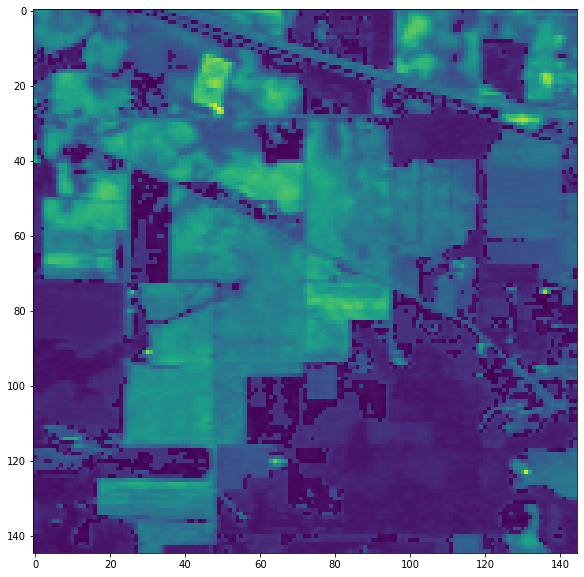

In [16]:
# Plot the dataset by considering only 1 band
fig = plt.figure(figsize = (10,10))
plt.imshow(indian_pines_IN[:,:,20], interpolation='nearest')
plt.show()

In [10]:
# Dimensionality Reduction to reduce the number of bands
# We will use the PCA technique (Principal component analysis)

In [18]:
# Reshape the data into a 2D array because the Standard Scalar method and the PCA expect a 2D array
new_indian_pines_data = indian_pines_data.reshape((indian_pines_data.shape[0]*indian_pines_data.shape[1]), indian_pines_data.shape[2])
print(new_indian_pines_data.shape)

(21025, 220)


In [19]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
new_indian_pines_data = StandardScaler().fit_transform(new_indian_pines_data)

In [21]:
# print standardize data
print(new_indian_pines_data)

[[ 0.6047628   0.21997468  0.8862633  ...  0.38894136  1.62910551
  -0.25604207]
 [-1.06326446  0.75820528  0.87074869 ...  1.17937664  1.62910551
  -0.97083976]
 [ 2.05583381  0.75820528  0.55657785 ...  1.26720278  1.06179023
   0.31579609]
 ...
 [ 0.55122814 -0.98670358  0.01744517 ... -0.66497235 -1.20747086
   0.31579609]
 [ 0.55686337  0.05503305 -0.66519764 ... -0.92845077 -0.7819844
  -0.39900161]
 [ 1.03022246 -1.00406586 -0.31224028 ... -1.01627691 -1.20747086
  -0.97083976]]


In [22]:
# Reduce the dimensions to 15
pca_decomp = PCA(n_components=15)
indian_pine_pca = pca_decomp.fit_transform(new_indian_pines_data)

In [23]:
# Print the amount of information of each band
print(pca_decomp.explained_variance_ratio_)

[0.62806038 0.17466068 0.0233653  0.01541328 0.0095739  0.00797514
 0.00721055 0.00596859 0.00497001 0.0047951  0.00449085 0.0043561
 0.00430774 0.00428283 0.00425735]


In [28]:
# Reshape data
indian_pine_pca_new = indian_pine_pca.reshape(145,145,15)
print(indian_pine_pca_new.shape)

(145, 145, 15)


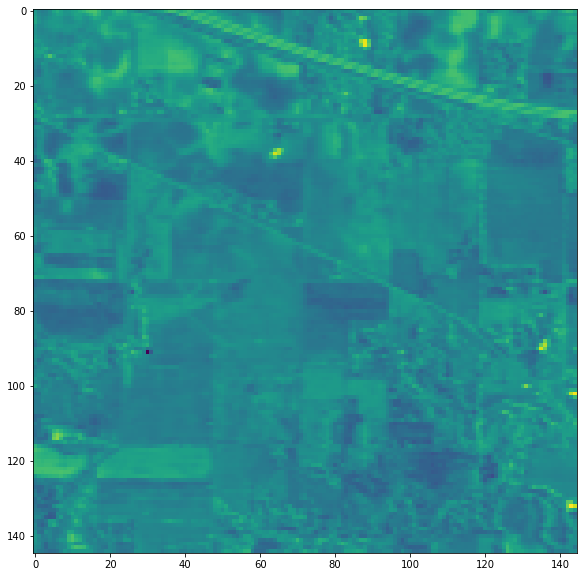

In [30]:
fig = plt.figure(figsize = (10,10))
plt.imshow(indian_pine_pca_new[:,:,1], interpolation='nearest')
plt.show()